In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "../data/NYPL-menus/"

In [3]:
dish = pd.read_csv(file_path+'Dish.csv')
menu = pd.read_csv(file_path+'menu.csv')
menuitem = pd.read_csv(file_path+'MenuItem.csv')
menupage = pd.read_csv(file_path+'MenuPage.csv')

#### Dish

In [4]:
dish.columns

Index(['id', 'name', 'description', 'menus_appeared', 'times_appeared',
       'first_appeared', 'last_appeared', 'lowest_price', 'highest_price'],
      dtype='object')

In [5]:
dish.id.nunique() / dish.shape[0]

1.0

In [6]:
dish.head()

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,NaN,8,8,1897,1927,0.20,0.4
1,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.8
2,3,Tomato aux croutons,NaN,13,13,1893,1917,0.25,0.4
3,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,NaN,66,68,1881,1981,0.00,18.0


In [7]:
dish.describe()

,id,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
count,423397.000000,0.0,423397.000000,423397.000000,423397.000000,423397.000000,394297.000000,394297.000000
mean,264456.594900,NaN,3.060489,3.146794,1675.514555,1679.299738,0.965265,1.603875
std,150489.070889,NaN,27.818178,29.962122,651.321461,651.934580,6.714564,12.696274
min,1.000000,NaN,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000
25%,132374.000000,NaN,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000
50%,269636.000000,NaN,1.000000,1.000000,1914.000000,1917.000000,0.000000,0.000000
75%,397135.000000,NaN,1.000000,1.000000,1949.000000,1955.000000,0.400000,0.600000
max,515677.000000,NaN,7740.000000,8484.000000,2928.000000,2928.000000,1035.000000,3050.000000


In [8]:
# If dish name is missing
dish.name.isna().sum()

0

<AxesSubplot:xlabel='first_appeared'>

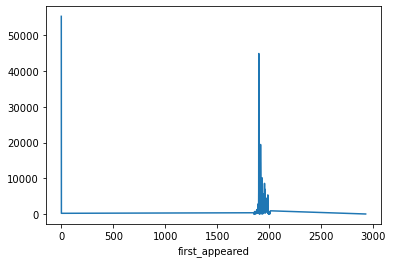

In [15]:
# Check frequency by year
dish.groupby(['first_appeared']).size().plot.line()

<AxesSubplot:xlabel='last_appeared'>

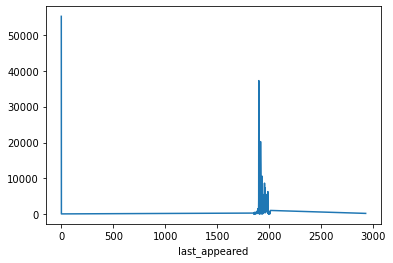

In [16]:
dish.groupby(['last_appeared']).size().plot.line()

In [17]:
# low price > high price
dish[dish.lowest_price > dish.highest_price]

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price


In [25]:
# Take one example to see how many variants of a dish name
dish[dish.name.str.lower().str.contains("chicken.*gumbo", regex=True)]

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
1,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.80
4542,5536,Cup of strained chicken gumbo,NaN,2,2,1900,1900,0.00,0.00
6428,7830,"Chicken Gumbo, in cup",NaN,3,3,1906,1907,0.30,0.30
7276,8842,"Chicken Gumbo, Strained",NaN,6,6,1900,1907,0.30,0.50
13055,16495,"Chicken Gumbo, Creole",NaN,21,21,1900,1953,0.25,0.75
...,...,...,...,...,...,...,...,...,...
416475,508152,Chicken gumbo with one roll and one piece of b...,NaN,1,2,1914,1914,0.10,0.10
416487,508164,"Chicken Gumbo, two slices of bread and one pie...",NaN,0,0,0,0,0.00,0.00
416488,508165,"Chicken Gumbo, two slices of bread and one pie...",NaN,1,1,1914,1914,0.10,0.10
419814,511887,chicken gumbo soup,NaN,1,1,1917,1917,0.40,0.40


#### Menu

In [11]:
menu.columns

Index(['id', 'name', 'sponsor', 'event', 'venue', 'place',
       'physical_description', 'occasion', 'notes', 'call_number', 'keywords',
       'language', 'date', 'location', 'location_type', 'currency',
       'currency_symbol', 'status', 'page_count', 'dish_count'],
      dtype='object')

In [17]:
menu.id.nunique() / menu.shape[0]

1.0

In [18]:
menu.head()

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,keywords,language,date,location,location_type,currency,currency_symbol,status,page_count,dish_count
0,12463,NaN,HOTEL EASTMAN,BREAKFAST,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,NaN,1900-2822,NaN,NaN,1900-04-15,Hotel Eastman,NaN,NaN,NaN,complete,2,67
1,12464,NaN,REPUBLICAN HOUSE,[DINNER],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,NaN,NaN,1900-04-15,Republican House,NaN,NaN,NaN,under review,2,34
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,84
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,LUNCH;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,63
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,DINNER;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,4,33


In [28]:
menu.describe()

,id,keywords,language,location_type,page_count,dish_count
count,17545.000000,0.0,0.0,0.0,17545.000000,17545.000000
mean,25325.953377,NaN,NaN,NaN,3.484412,75.617213
std,6431.552203,NaN,NaN,NaN,3.295643,98.435862
min,12463.000000,NaN,NaN,NaN,1.000000,0.000000
25%,20742.000000,NaN,NaN,NaN,2.000000,20.000000
50%,26165.000000,NaN,NaN,NaN,2.000000,35.000000
75%,30707.000000,NaN,NaN,NaN,4.000000,93.000000
max,35526.000000,NaN,NaN,NaN,74.000000,4053.000000


In [37]:
menu.isna().sum() / menu.shape[0]

id                      0.000000
name                    0.817783
sponsor                 0.088971
event                   0.535252
venue                   0.537247
place                   0.537019
physical_description    0.158564
occasion                0.783927
notes                   0.395098
call_number             0.089028
keywords                1.000000
language                1.000000
date                    0.033400
location                0.000000
location_type           1.000000
currency                0.632032
currency_symbol         0.632032
status                  0.000000
page_count              0.000000
dish_count              0.000000
dtype: float64

#### MenuItem

In [20]:
menuitem.columns

Index(['id', 'menu_page_id', 'price', 'high_price', 'dish_id', 'created_at',
       'updated_at', 'xpos', 'ypos'],
      dtype='object')

In [21]:
menuitem.id.nunique() / menuitem.shape[0]

1.0

In [22]:
menuitem.head()

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,0.4,NaN,1.0,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
1,2,1389,0.6,NaN,2.0,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
2,3,1389,0.4,NaN,3.0,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
3,4,1389,0.5,NaN,4.0,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
4,5,3079,0.5,1.0,5.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


In [26]:
menuitem.dish_id.value_counts()

96.0        8484
97.0        4769
15.0        4690
1177.0      4555
7.0         3346
            ... 
205033.0       1
205031.0       1
205028.0       1
205027.0       1
515564.0       1
Name: dish_id, Length: 414138, dtype: int64

In [29]:
menuitem.describe()

,id,menu_page_id,price,high_price,dish_id,xpos,ypos
count,1.332726e+06,1.332726e+06,886810.000000,91905.000000,1.332485e+06,1.332726e+06,1.332726e+06
mean,6.978984e+05,4.759487e+04,12.838627,8.106321,1.580110e+05,3.890132e-01,5.497062e-01
std,3.999807e+05,2.203921e+04,499.547387,90.095222,1.677620e+05,2.208378e-01,2.239532e-01
min,1.000000e+00,1.300000e+02,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.502512e+05,3.204900e+04,0.250000,0.500000,5.089000e+03,1.842860e-01,3.669165e-01
50%,7.024105e+05,5.337100e+04,0.400000,1.250000,8.070000e+04,3.771430e-01,5.672940e-01
75%,1.045549e+06,6.682300e+04,1.000000,3.000000,3.325240e+05,5.653330e-01,7.385308e-01
max,1.385906e+06,7.742500e+04,180000.000000,7800.000000,5.156770e+05,9.853330e-01,9.982300e-01


In [38]:
menuitem.isna().sum() / menuitem.shape[0]

id              0.000000
menu_page_id    0.000000
price           0.334589
high_price      0.931040
dish_id         0.000181
created_at      0.000000
updated_at      0.000000
xpos            0.000000
ypos            0.000000
dtype: float64

In [18]:
# price > high price
menuitem[menuitem.price > menuitem.high_price]

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
1352,1455,168,40.00,0.4,1034.0,2011-04-19 19:40:31 UTC,2011-12-05 03:06:28 UTC,0.217143,0.223982
2122,2303,3079,1.00,0.2,1641.0,2011-04-19 23:38:02 UTC,2011-04-19 23:38:02 UTC,0.172857,0.635264
2464,2694,4782,0.50,0.3,1921.0,2011-04-20 01:39:39 UTC,2011-05-01 04:40:12 UTC,0.408571,0.862274
2489,2724,168,2.00,1.0,1941.0,2011-04-20 01:47:54 UTC,2011-04-20 01:47:54 UTC,0.460000,0.580359
3864,4254,1388,1.00,0.5,2962.0,2011-04-20 06:25:49 UTC,2011-04-20 06:25:49 UTC,0.117143,0.464918
...,...,...,...,...,...,...,...,...,...
1298635,1350803,76350,0.50,0.1,434578.0,2014-09-10 03:58:02 UTC,2014-09-10 03:58:02 UTC,0.526667,0.673693
1301721,1353921,76346,1.00,0.6,1474.0,2014-09-19 14:40:44 UTC,2014-09-19 14:43:02 UTC,0.149333,0.440462
1301724,1353924,76346,50.00,1.0,390145.0,2014-09-19 14:43:19 UTC,2014-09-19 14:43:19 UTC,0.128000,0.569001
1304466,1356727,76544,25.00,5.0,489930.0,2014-10-02 15:06:40 UTC,2014-10-02 15:06:40 UTC,0.412000,0.518781


In [20]:
# dish id not in dish table
menuitem[~menuitem.dish_id.isin(dish.id)]

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
17058,19171,6706,NaN,NaN,NaN,2011-04-21 15:37:27 UTC,2011-04-21 15:45:51 UTC,0.250000,0.910850
20044,22322,3817,NaN,NaN,NaN,2011-04-21 18:16:13 UTC,2011-04-21 18:17:01 UTC,0.341429,0.704721
28458,31566,7355,NaN,NaN,NaN,2011-04-22 02:50:52 UTC,2011-04-22 18:48:41 UTC,0.568571,0.346818
30291,33486,11348,NaN,NaN,NaN,2011-04-22 06:35:32 UTC,2011-04-22 06:39:39 UTC,0.164286,0.477882
33111,36645,7356,NaN,NaN,NaN,2011-04-22 16:23:28 UTC,2011-04-22 18:59:11 UTC,0.184286,0.346567
...,...,...,...,...,...,...,...,...,...
889158,932573,47175,NaN,NaN,NaN,2012-05-14 03:16:30 UTC,2012-05-14 03:22:36 UTC,0.687143,0.275966
930243,974746,62976,NaN,NaN,NaN,2012-06-20 05:17:58 UTC,2012-06-20 05:32:58 UTC,0.210000,0.115715
936817,981533,62740,NaN,NaN,NaN,2012-06-22 20:57:32 UTC,2012-06-22 20:58:18 UTC,0.175714,0.250947
939086,983976,65327,NaN,NaN,NaN,2012-06-23 21:47:35 UTC,2012-06-23 21:41:38 UTC,0.405714,0.176490


In [22]:
# menu page id not in menu page table
menuitem[~menuitem.menu_page_id.isin(menupage.id)]

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos


#### MenuPage

In [23]:
menupage.columns

Index(['id', 'menu_id', 'page_number', 'image_id', 'full_height', 'full_width',
       'uuid'],
      dtype='object')

In [24]:
menupage.id.nunique() / menupage.shape[0]

1.0

In [25]:
menupage.head()

,id,menu_id,page_number,image_id,full_height,full_width,uuid
0,119,12460,1.0,1603595,7230.0,5428.0,510d47e4-2955-a3d9-e040-e00a18064a99
1,120,12460,2.0,1603596,5428.0,7230.0,510d47e4-2956-a3d9-e040-e00a18064a99
2,121,12460,3.0,1603597,7230.0,5428.0,510d47e4-2957-a3d9-e040-e00a18064a99
3,122,12460,4.0,1603598,7230.0,5428.0,510d47e4-2958-a3d9-e040-e00a18064a99
4,123,12461,1.0,1603591,7230.0,5428.0,510d47e4-2959-a3d9-e040-e00a18064a99


In [30]:
menupage.describe()

,id,menu_id,page_number,full_height,full_width
count,66937.000000,66937.000000,65735.000000,66608.000000,66608.000000
mean,42719.760596,25653.580904,3.759169,3859.102856,2778.588398
std,21273.997831,6158.827683,4.909050,1156.010307,970.287300
min,119.000000,12460.000000,1.000000,616.000000,558.000000
25%,27108.000000,21743.000000,1.000000,2988.000000,2120.000000
50%,43894.000000,26202.000000,2.000000,3630.000000,2527.000000
75%,60696.000000,30531.000000,4.000000,4617.250000,3295.250000
max,77431.000000,35526.000000,74.000000,12044.000000,9175.000000


In [23]:
# menu id not in menu table
menupage[~menupage.menu_id.isin(menu.id)]

,id,menu_id,page_number,image_id,full_height,full_width,uuid
0,119,12460,1.0,1603595,7230.0,5428.0,510d47e4-2955-a3d9-e040-e00a18064a99
1,120,12460,2.0,1603596,5428.0,7230.0,510d47e4-2956-a3d9-e040-e00a18064a99
2,121,12460,3.0,1603597,7230.0,5428.0,510d47e4-2957-a3d9-e040-e00a18064a99
3,122,12460,4.0,1603598,7230.0,5428.0,510d47e4-2958-a3d9-e040-e00a18064a99
4,123,12461,1.0,1603591,7230.0,5428.0,510d47e4-2959-a3d9-e040-e00a18064a99
...,...,...,...,...,...,...,...
66922,77417,35525,2.0,5194206,2942.0,1990.0,af4751c0-6212-0132-6245-58d385a7bbd0
66923,77418,35525,3.0,5194207,2837.0,2628.0,af604d50-6212-0132-b41d-58d385a7bbd0
66924,77419,35525,4.0,5194208,2852.0,2002.0,af7910c0-6212-0132-e227-58d385a7bbd0
66925,77420,35525,5.0,5194209,2835.0,1990.0,af92d3f0-6212-0132-6b8d-58d385a7bbd0
